In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [22]:
df = pd.read_excel('dulieu/Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [24]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [29]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [30]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

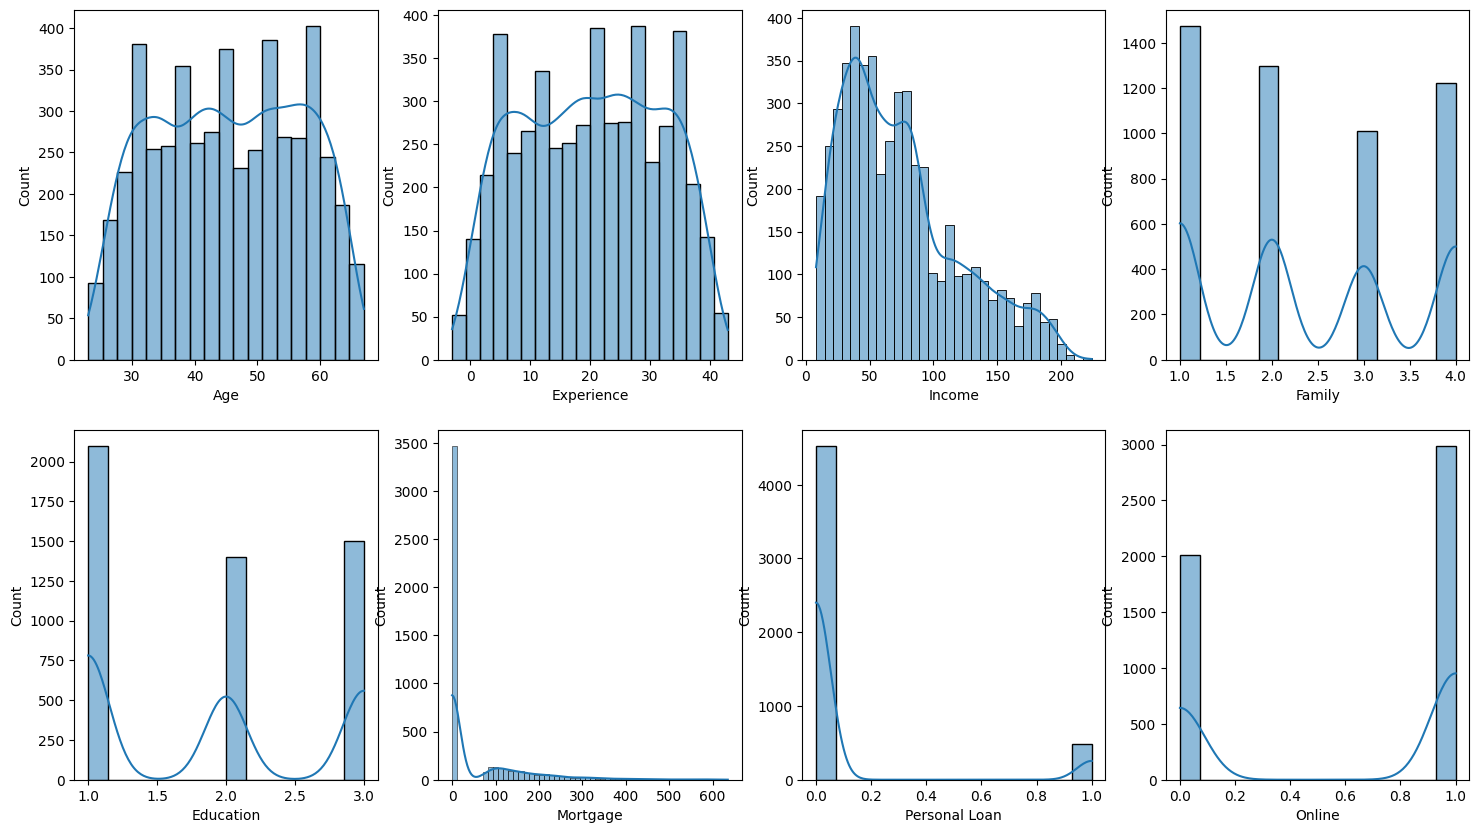

In [37]:
fig = plt.figure(figsize=(18,10))
colnames = ['Age','Experience','Income','Family','Education','Mortgage','Personal Loan','Online']

for i in range(len(colnames)):
    colname = colnames[i]
    sub = fig.add_subplot(2, 4, i + 1)
    sns.histplot(df, x=colname, kde=True)

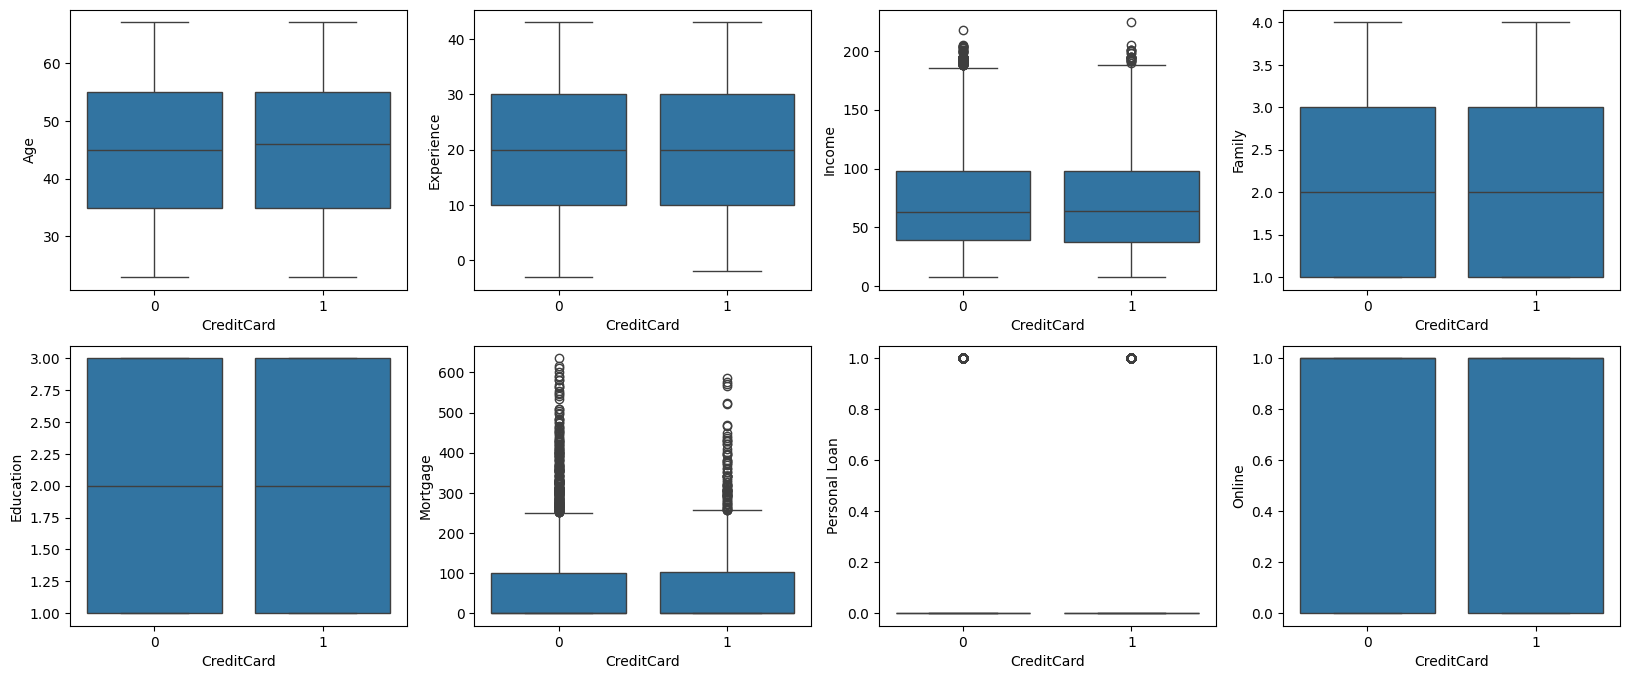

In [41]:
fig = plt.figure(figsize=(20,8))

for i in range(len(colnames)):
    colname = colnames[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.boxplot(data=df,y=colname, x="CreditCard")

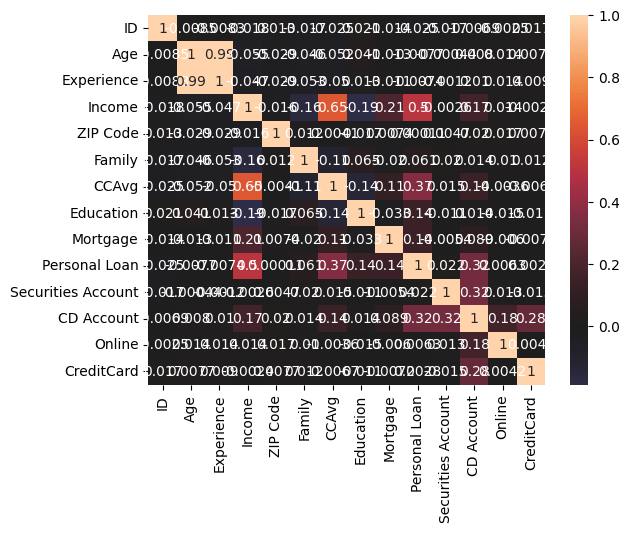

<Figure size 1500x1000 with 0 Axes>

In [43]:
corr = df.corr()
sns.heatmap(corr, annot=True, center=0)
plt.figure(figsize=(15,10))
plt.show()

Model: KNeighborsClassifier, Scaller: StandardScaler
accurcy score: 0.696
confusion matrix:
 [[696   0]
 [304   0]]
roc: 0.5
classification report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82       696
           1       0.00      0.00      0.00       304

    accuracy                           0.70      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.48      0.70      0.57      1000



c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Us

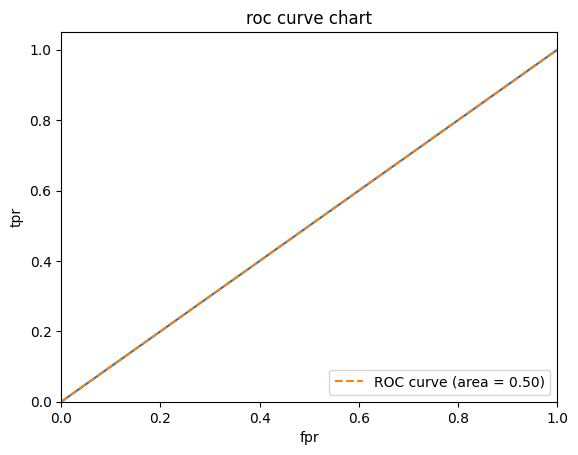

In [74]:
from sklearn.tree import plot_tree

def run_model(df, scaller, model):
    X = df[['Age','Experience','Income','Family','Education','Mortgage','Personal Loan','Online']]
    y = df[['CreditCard']]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

    X_train_scaled = scaller.fit_transform(X_train)
    X_test_scaled = scaller.transform(X_test)

    model.fit(X_train_scaled, y_train)
    
    y_pred_proba = model.predict_proba(X_test_scaled)
    threshold = 0.9
    # y_pred = model.predict(X_test_scaled)
    y_pred = (y_pred_proba[:, 1] >= threshold).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    cfmx = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    print(f'Model: {model.__class__.__name__}, Scaller: {scaller.__class__.__name__}')
    print(f'accurcy score: {accuracy}')
    print(f'confusion matrix:\n {cfmx}')
    print(f'roc: {roc}')
    print(f'classification report:\n {class_report}')

    if (model.__class__.__name__ == 'DecisionTreeClassifier'):
        plt.figure(figsize=(15,20))
        print(X_train.__class__)
        feature_names = X_train.columns
        plot_tree(model, feature_names=feature_names)
        plt.show()

    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--', label='ROC curve (area = %0.2f)' % roc)
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.05])
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('roc curve chart')
    plt.legend(loc='lower right')
    plt.show()

run_model(df, StandardScaler(), KNeighborsClassifier(n_neighbors=22))
# run_model(df, MaxAbsScaler(), KNeighborsClassifier(n_neighbors=22))
# run_model(df, StandardScaler(), KNeighborsClassifier(n_neighbors=22))

# run_model(df, MinMaxScaler(), DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10))
# run_model(df, MaxAbsScaler(), DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10))
# run_model(df, StandardScaler(), DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10))